# Phugoid

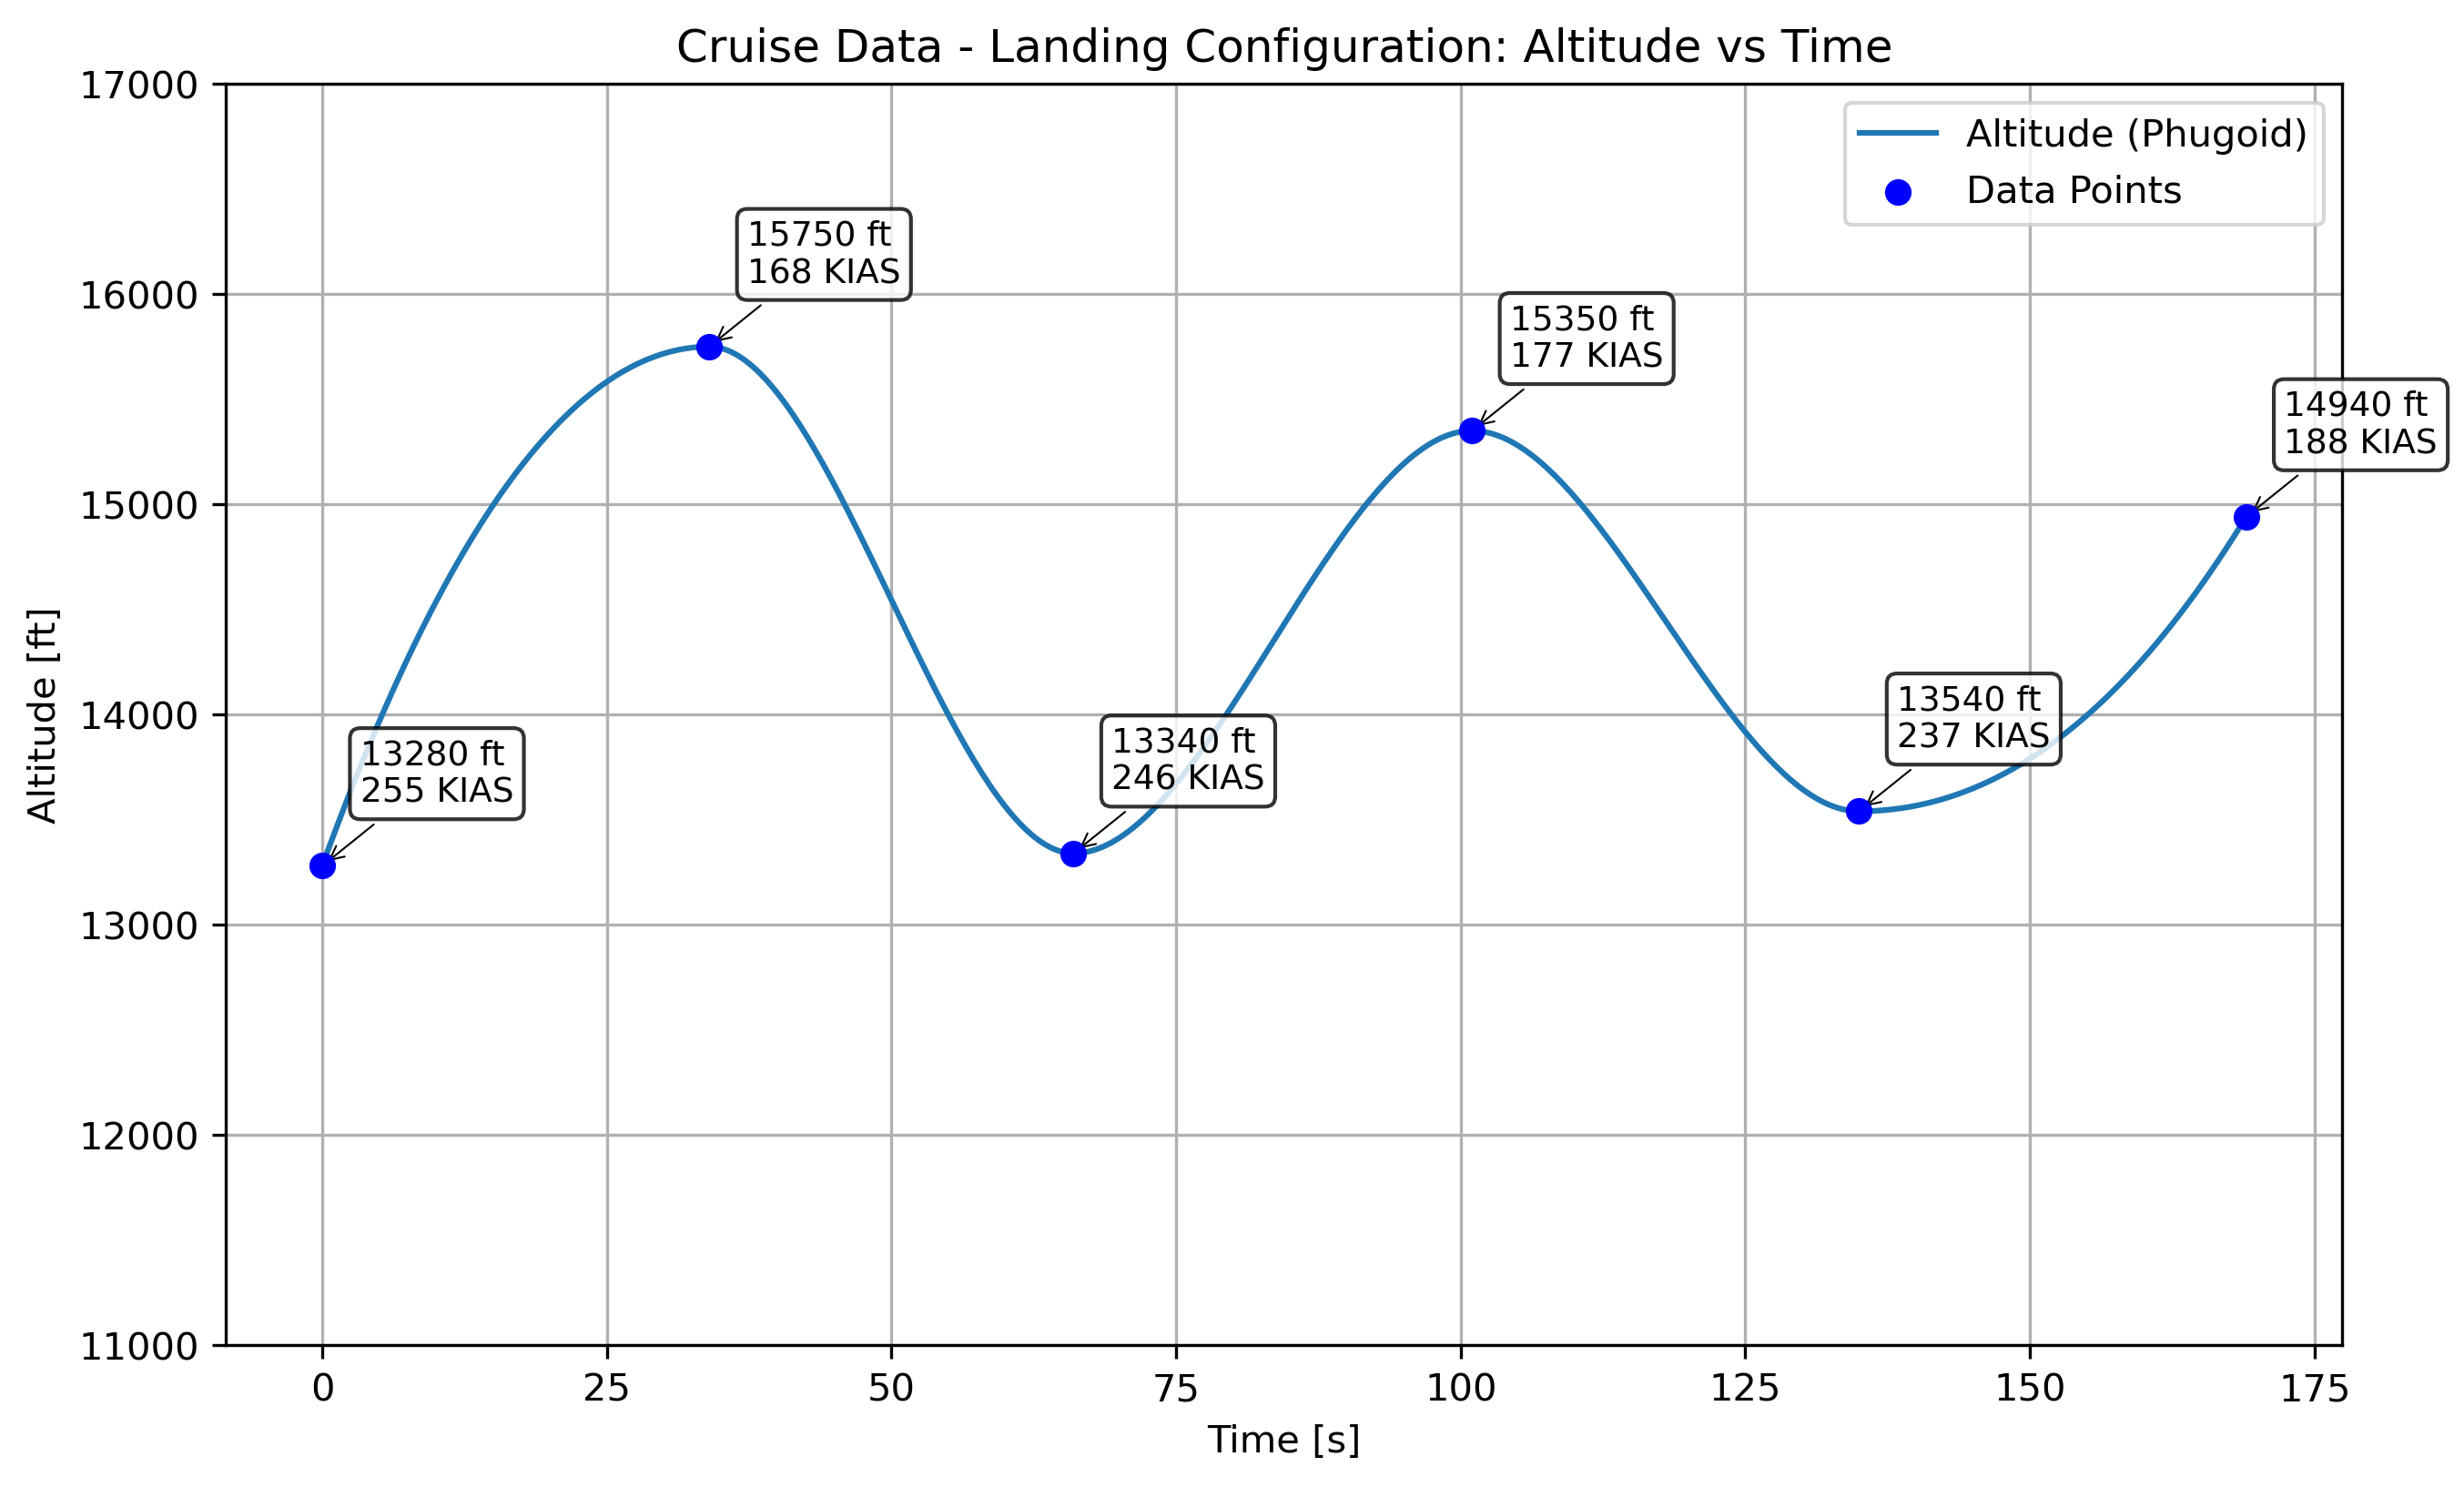

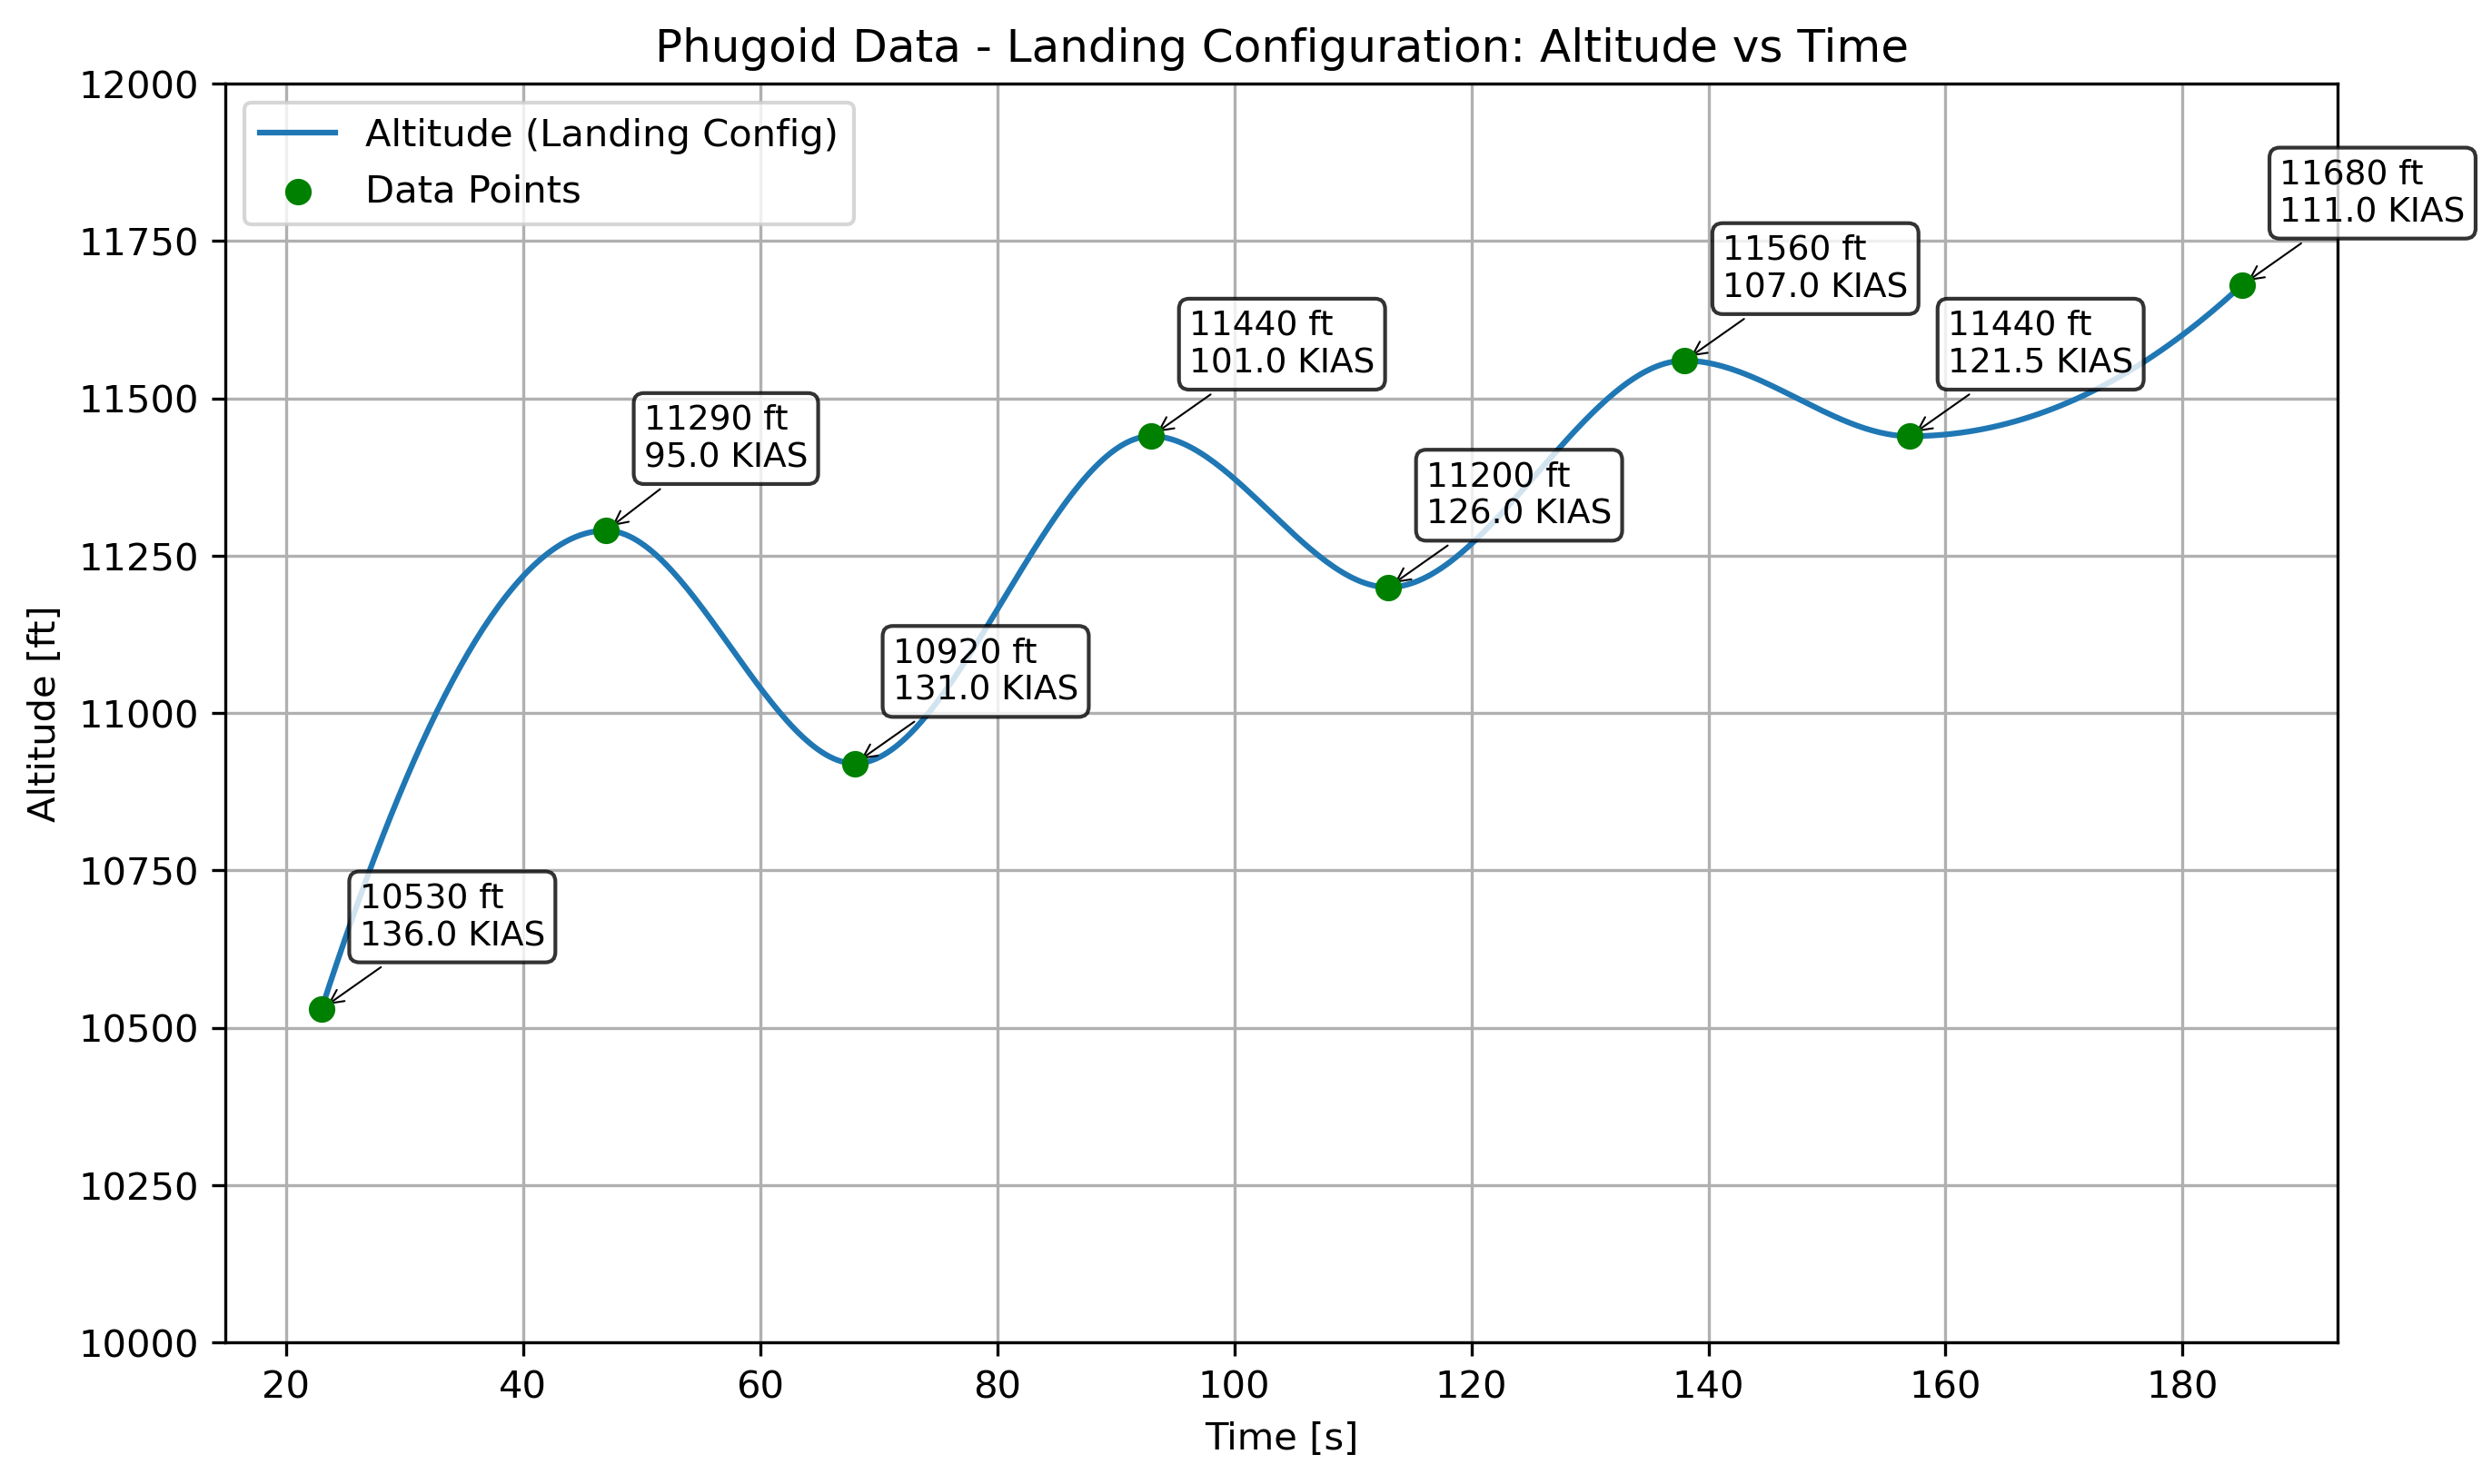

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# First plot data (Phugoid)
time_phugoid = np.array([0, 34, 66, 101, 135, 169])  # Time in seconds
altitude_phugoid = np.array([13280, 15750, 13340, 15350, 13540, 14940])  # Altitude in feet
airspeed_phugoid = np.array([255, 168, 246, 177, 237, 188])  # Airspeed in KIAS

# Second plot data (Landing Configuration)
time_landing = np.array([23, 47, 68, 93, 113, 138, 157, 185])  # Time in seconds
altitude_landing = np.array([10530, 11290, 10920, 11440, 11200, 11560, 11440, 11680])  # Altitude in feet
airspeed_landing = np.array([136, 95, 131, 101, 126, 107, 121.5, 111])  # Airspeed in KIAS

# Fit PCHIP interpolators
pchip_phugoid = PchipInterpolator(time_phugoid, altitude_phugoid)
pchip_landing = PchipInterpolator(time_landing, altitude_landing)

# Generate smooth time points
time_smooth_phugoid = np.linspace(time_phugoid[0], time_phugoid[-1], 500)
time_smooth_landing = np.linspace(time_landing[0], time_landing[-1], 500)

altitude_smooth_phugoid = pchip_phugoid(time_smooth_phugoid)
altitude_smooth_landing = pchip_landing(time_smooth_landing)

# First plot (Phugoid)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(time_smooth_phugoid, altitude_smooth_phugoid, label="Altitude (Phugoid)", linestyle="-")
plt.scatter(time_phugoid, altitude_phugoid, color="blue", label="Data Points", zorder=5)

# Annotate each data point with altitude and airspeed for phugoid
for t, h, v in zip(time_phugoid, altitude_phugoid, airspeed_phugoid):
    plt.annotate(
        f"{h} ft\n{v} KIAS", 
        (t, h), 
        xytext=(10, 15), 
        textcoords="offset points", 
        fontsize=9, ha="left", va="bottom",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8),
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    )

# Labels and title for the first plot
plt.xlabel("Time [s]")
plt.ylabel("Altitude [ft]")
plt.ylim(11000, 17000)
plt.title("Cruise Data - Landing Configuration: Altitude vs Time")
plt.legend()
plt.grid(True)
plt.savefig("./output/plots/phugoid-cruise.png")
plt.show()

# Second plot (Landing Configuration)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(time_smooth_landing, altitude_smooth_landing, label="Altitude (Landing Config)", linestyle="-")
plt.scatter(time_landing, altitude_landing, color="green", label="Data Points", zorder=5)

# Annotate each data point with altitude and airspeed for landing configuration
for t, h, v in zip(time_landing, altitude_landing, airspeed_landing):
    plt.annotate(
        f"{h} ft\n{v} KIAS", 
        (t, h), 
        xytext=(10, 15), 
        textcoords="offset points", 
        fontsize=9, ha="left", va="bottom",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8),
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    )

# Labels and title for the second plot
plt.xlabel("Time [s]")
plt.ylabel("Altitude [ft]")
plt.ylim(10000, 12000)
plt.title("Phugoid Data - Landing Configuration: Altitude vs Time")
plt.legend()
plt.grid(True)
plt.savefig("./output/plots/phugoid-landing.png")
plt.grid(True)

plt.show()
